<a href="https://colab.research.google.com/github/RayyanAhmed76/Product-Catalog/blob/main/electronModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Project

## Load Data


In [24]:
import pandas as pd

df=pd.read_csv('delaney_solubility_with_descriptors.csv')
df.tail()
df.isnull().sum()
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


#Data Prepration

## Data seperation of x and y

In [30]:
y=df['logS']
y
x=df.drop('logS',axis=1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


## Data Splitting

In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# Model Buliding

## Training the model

In [41]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
LinearRegression()


LinearRegression()

## Applying a model to make prediction

In [45]:
y_lr_train_pred=lr.predict(x_train)
y_lr_test_pred=lr.predict(x_test)


## Evaluate model performance

In [57]:
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
lr_train_mse=mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2=r2_score(y_train,y_lr_train_pred)

lr_test_mse=mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2=r2_score(y_test,y_lr_test_pred)

lr_result=pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
lr_result.columns=['Model','Training MSE','Training R2','Testing MSE','Testing R2']
lr_result

,Model,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565


# Random Forest

## Training the model

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=2,random_state=42)
rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=2, random_state=42)

## Applying the model to make prediction

In [62]:
rf_train_pred=rf.predict(x_train)
rf_test_pred=rf.predict(x_test)


## Evaluate model performance

In [70]:
rf_train_mse=mean_squared_error(y_train,rf_train_pred)
rf_train_r2_score=r2_score(y_train,rf_train_pred)

rf_test_mse=mean_squared_error(y_test,rf_test_pred)
rf_test_r2_score=r2_score(y_test,rf_test_pred)

rf_result=pd.DataFrame(['RandomForest',rf_train_mse,rf_train_r2_score,rf_test_mse,rf_test_r2_score]).transpose()
rf_result.columns=['Model','Training MSE','Training R2','Testing MSE','Testing R2']
result=pd.concat([lr_result,rf_result],axis=0)
result.reset_index(drop=True)

,Model,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear regression,1.013989,0.769513,0.999084,0.770565
1,RandomForest,1.050251,0.76127,1.046995,0.759562


# Data visualization

<Figure size 500x500 with 0 Axes>

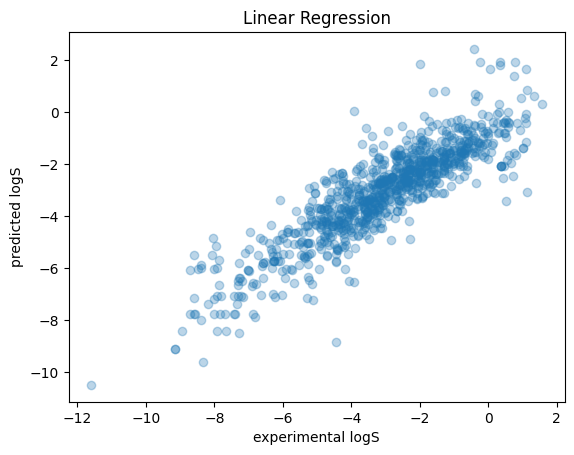

<Figure size 500x500 with 0 Axes>

In [78]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train,y=y_lr_train_pred,alpha=0.3)
plt.plot()
plt.xlabel('experimental logS')
plt.ylabel('predicted logS')
plt.title('Linear Regression')
plt.figure(figsize=(5,5))